<html><head>



Carolyn Massa - April, 2020

Capstone #2 - AirBnb Price Prediction - An exploration into key factors that determine the pricing of an AIRBNB

    THIS NOTEBOOK is an adjunct section to my PRIMARY NOTEBOOK as this features AIRBNB in the dataset that is 
    OUTSIDE PARIS ONLY
    
<ol>
Primary Source of AirBNB Data:
<li> http://insideairbnb.com/get-the-data.html</li>
Supplementary Sources of Data:
<li>2018 top 10 attractions in Paris</li> 
<li>Haversine Formula</li>
</ol>

</script>

</head>

<body>
    <h2>Here's a high-level overview as this notebook is strictly for DATA Exploration for OUTSIDE PARIS:
</h2>
<ol>
  <li>Data Collection</li>
  <li>Exploratory Data Analysis</li>
  <li>Data Wrangling</li>
  
</ol>



<head>



1) I would like to be able to explore and answer the following questions:
•	How does each location influence the property rental price?  
•	Do reviews affect the pricing?  
•	Can a traveler stay close to the main attractions such as the Eiffel Tower and the most popular museums such as the Louvre and Musee D’Orsay?
•	What other features drive the price of an airbnb rental property?
o	i.e. price vs location, price vs distance from a top attraction, price vs. access to transportation and perhaps convention centers as there are many conventions in September

2) Recommend Airbnb properties given a certain criteria, and enable a more informed decision for a traveler:

•	walking distance to one of the top attractions (within 2 miles)
•	walking distance to metro or other mass transit stations (within 1 mile)
•	rating >= 8 miles
•	other user defined criteria i.e. cleanliness, views, etc
•	number of beds
•	number of bedrooms
•	price range
•	type of property

3) How well can we predict a listing's price and what features correlate well with the pricing?

Business Case questions:

Where to invest in a property in Paris to get the maximum number of returns from Airbnb?
How well can we predict reviews and what features correlate well with the reviews?
Which neighborhoods have the largest increase in listings from 2015 to 2019?

In this notebook I plan to just show EDA and results outside Paris and different functions of Calendar DataSet

</body>
</html>



# Below I import my libraries to collect and  explore my data

In [108]:
#Data Collection

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import geopandas
import branca
import folium
import urllib
import os
print(os.getcwd())
import pyximport
pyximport.install()
import squarify
import re
from datetime import date
import datetime
import calendar


#Stats Modeling/Comparisons of Means

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import scipy.stats as stats
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from shapely.geometry import Point
import shapely.ops as sp_ops
import pyproj
import functools


import pandas_profiling

import ipywidgets as widgets

#Data Modeling/Algorithms

import sklearn
import scipy








C:\Users\1800r\AIRBNB_VS_RENTALVALUES\PythonCode


# Data Collection and Review - First let's read our date in and see what we are working with.
#I import my datasets from insideAirBNB by the years and Months I will Analyze (2015, 2016 & 2019)

In [52]:
#First let's Analyze a typical dataset of the listings by month to review the data points
#I start with 2019 for 5 months from insideairbnb.com

listing_2019_04_OP = pd.read_csv('Listing_2019_04_Cleaned.csv')





In [53]:
listing_2019_IP = pd.read_csv('Listing_2019_04_Cleaned.csv')

In [54]:
listing_2019_IP.head(5)

,Unnamed: 0,id,host_id,host_name,host_since,host_location,host_response_time,instant_bookable,host_response_rate,host_is_superhost,host_identity_verified,first_review,instant_bookable.1,guests_included,extra_people,neighbourhood,beds,cleaning_fee,latitude,longitude,zipcode,smart_location,property_type,room_type,accommodates,bed_type,security_deposit,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,minimum_nights,number_of_reviews,reviews_per_month,cancellation_policy,calculated_host_listings_count,availability_30,availability_60,availability_90,availability_365,last_review,rating_ind,check_in_24h,wifi,heating,washer_dryer,kitchen,Toiletries,hangers,laptop space,family_friendly,fire protection,refrigerator,elevator,bed linens,coffee_maker,hot_water,tv,self_check_in,hair_dryer,dryer
0,0,2394,2626,Franck,2008-08-30 00:00:00,"Paris, Île-de-France, France",within an hour,f,100%,t,t,2008-11-03,f,1,$0.00,Temple,1.0,$30.00,48.86518,2.35590,75003,"Paris, France",Apartment,Entire home/apt,2,Real Bed,$200.00,89.0,9.0,8.0,9.0,9.0,9.0,9.0,52,7,71,0.56,moderate,2,9,31,52,315,2015-09-05,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
1,1,2577,2827,Karine,2008-09-09 00:00:00,"Casablanca, Grand Casablanca, Morocco",0,t,NaN,f,t,2019-01-02,t,1,$0.00,Entrepôt,2.0,$40.00,48.86993,2.36251,75010,"Paris, France",Loft,Entire home/apt,4,Real Bed,$0.00,100.0,10.0,10.0,10.0,10.0,10.0,10.0,125,3,1,0.31,strict_14_with_grace_period,1,0,0,0,148,2019-01-02,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,2,3109,3631,Anne,2008-10-14 00:00:00,"Paris, Île-de-France, France",within an hour,f,100%,f,f,2016-12-27,f,1,$0.00,Observatoire,0.0,$50.00,48.83349,2.31852,75014,"Paris, France",Apartment,Entire home/apt,2,Real Bed,$0.00,100.0,10.0,10.0,10.0,10.0,10.0,10.0,75,3,8,0.29,flexible,1,15,15,15,277,2018-12-19,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN
3,3,5396,7903,Borzou,2009-02-14 00:00:00,"Istanbul, İstanbul, Turkey",within an hour,t,100%,f,t,2009-06-30,t,1,$0.00,Hôtel-de-Ville,1.0,$36.00,48.85100,2.35869,75004,"Paris, France",Apartment,Entire home/apt,2,Pull-out Sofa,$0.00,91.0,9.0,8.0,9.0,9.0,10.0,9.0,115,1,168,1.41,strict_14_with_grace_period,1,1,1,21,59,2019-03-25,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,NaN
4,4,7397,2626,Franck,2008-08-30 00:00:00,"Paris, Île-de-France, France",within an hour,f,100%,t,t,2011-04-08,f,2,$10.00,Hôtel-de-Ville,2.0,$50.00,48.85758,2.35275,75004,"Paris, France",Apartment,Entire home/apt,4,Real Bed,$200.00,94.0,10.0,9.0,10.0,10.0,10.0,10.0,115,10,241,2.47,moderate,2,0,10,23,216,2019-03-22,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,NaN


In [55]:
listing_2019_IP.shape

(58164, 65)

In [56]:
listing_2019_04_OP.head(5) #Below in my first list I see 18 variables related to the listing host and id, price and area

,Unnamed: 0,id,host_id,host_name,host_since,host_location,host_response_time,instant_bookable,host_response_rate,host_is_superhost,host_identity_verified,first_review,instant_bookable.1,guests_included,extra_people,neighbourhood,beds,cleaning_fee,latitude,longitude,zipcode,smart_location,property_type,room_type,accommodates,bed_type,security_deposit,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,minimum_nights,number_of_reviews,reviews_per_month,cancellation_policy,calculated_host_listings_count,availability_30,availability_60,availability_90,availability_365,last_review,rating_ind,check_in_24h,wifi,heating,washer_dryer,kitchen,Toiletries,hangers,laptop space,family_friendly,fire protection,refrigerator,elevator,bed linens,coffee_maker,hot_water,tv,self_check_in,hair_dryer,dryer
0,0,2394,2626,Franck,2008-08-30 00:00:00,"Paris, Île-de-France, France",within an hour,f,100%,t,t,2008-11-03,f,1,$0.00,Temple,1.0,$30.00,48.86518,2.35590,75003,"Paris, France",Apartment,Entire home/apt,2,Real Bed,$200.00,89.0,9.0,8.0,9.0,9.0,9.0,9.0,52,7,71,0.56,moderate,2,9,31,52,315,2015-09-05,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
1,1,2577,2827,Karine,2008-09-09 00:00:00,"Casablanca, Grand Casablanca, Morocco",0,t,NaN,f,t,2019-01-02,t,1,$0.00,Entrepôt,2.0,$40.00,48.86993,2.36251,75010,"Paris, France",Loft,Entire home/apt,4,Real Bed,$0.00,100.0,10.0,10.0,10.0,10.0,10.0,10.0,125,3,1,0.31,strict_14_with_grace_period,1,0,0,0,148,2019-01-02,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,2,3109,3631,Anne,2008-10-14 00:00:00,"Paris, Île-de-France, France",within an hour,f,100%,f,f,2016-12-27,f,1,$0.00,Observatoire,0.0,$50.00,48.83349,2.31852,75014,"Paris, France",Apartment,Entire home/apt,2,Real Bed,$0.00,100.0,10.0,10.0,10.0,10.0,10.0,10.0,75,3,8,0.29,flexible,1,15,15,15,277,2018-12-19,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN
3,3,5396,7903,Borzou,2009-02-14 00:00:00,"Istanbul, İstanbul, Turkey",within an hour,t,100%,f,t,2009-06-30,t,1,$0.00,Hôtel-de-Ville,1.0,$36.00,48.85100,2.35869,75004,"Paris, France",Apartment,Entire home/apt,2,Pull-out Sofa,$0.00,91.0,9.0,8.0,9.0,9.0,10.0,9.0,115,1,168,1.41,strict_14_with_grace_period,1,1,1,21,59,2019-03-25,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,NaN
4,4,7397,2626,Franck,2008-08-30 00:00:00,"Paris, Île-de-France, France",within an hour,f,100%,t,t,2011-04-08,f,2,$10.00,Hôtel-de-Ville,2.0,$50.00,48.85758,2.35275,75004,"Paris, France",Apartment,Entire home/apt,4,Real Bed,$200.00,94.0,10.0,9.0,10.0,10.0,10.0,10.0,115,10,241,2.47,moderate,2,0,10,23,216,2019-03-22,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,NaN


In [57]:
#now let's look at the quantity of our observations starting with 2015 and see how the listings have grown with the popularity of AirBNB

In [58]:
listing_2019_04_OP.shape #Here we see how many Variables and observations we have

(58164, 65)

In [59]:

Geo_NBH_2019_OP = geopandas.read_file('neighbourhoods_2019_05.geojson',
                                     driver='GeoJSON')

In [60]:
Geo_NBH_2019_OP.head(5)

,neighbourhood,neighbourhood_group,geometry
0,Batignolles-Monceau,None,"MULTIPOLYGON (((2.29517 48.87396, 2.29504 48.8..."
1,Palais-Bourbon,None,"MULTIPOLYGON (((2.32090 48.86306, 2.32094 48.8..."
2,Buttes-Chaumont,None,"MULTIPOLYGON (((2.38943 48.90122, 2.39014 48.9..."
3,Opéra,None,"MULTIPOLYGON (((2.33978 48.88203, 2.33982 48.8..."
4,Entrepôt,None,"MULTIPOLYGON (((2.36469 48.88437, 2.36485 48.8..."


In [61]:
Geo_NBH_2019_OP.shape # We see 20 neighborhoods and 3 Variables

(20, 3)

In [62]:
import json #Here I use GEOJSON to review the features in the neighborhood groups
with open('neighbourhoods_2019_05.geojson') as f:
    data = json.load(f)
for feature in data['features']:
    print(feature['properties'])

{'neighbourhood': 'Batignolles-Monceau', 'neighbourhood_group': None}
{'neighbourhood': 'Palais-Bourbon', 'neighbourhood_group': None}
{'neighbourhood': 'Buttes-Chaumont', 'neighbourhood_group': None}
{'neighbourhood': 'OpÃ©ra', 'neighbourhood_group': None}
{'neighbourhood': 'EntrepÃ´t', 'neighbourhood_group': None}
{'neighbourhood': 'Gobelins', 'neighbourhood_group': None}
{'neighbourhood': 'Vaugirard', 'neighbourhood_group': None}
{'neighbourhood': 'Reuilly', 'neighbourhood_group': None}
{'neighbourhood': 'Louvre', 'neighbourhood_group': None}
{'neighbourhood': 'Luxembourg', 'neighbourhood_group': None}
{'neighbourhood': 'Ã‰lysÃ©e', 'neighbourhood_group': None}
{'neighbourhood': 'Temple', 'neighbourhood_group': None}
{'neighbourhood': 'MÃ©nilmontant', 'neighbourhood_group': None}
{'neighbourhood': 'PanthÃ©on', 'neighbourhood_group': None}
{'neighbourhood': 'Passy', 'neighbourhood_group': None}
{'neighbourhood': 'Observatoire', 'neighbourhood_group': None}
{'neighbourhood': 'Popincour

# Below I will work with my Listing Summary data as well as the Full detailed Listings

In [63]:
listing_2019_04_OP.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,58164.0,2.908936e+04,1.679597e+04,0.00000,1.454475e+04,2.908750e+04,4.363425e+04,5.818300e+04
id,58164.0,1.705032e+07,9.925790e+06,2394.00000,7.737166e+06,1.756657e+07,2.570886e+07,3.371681e+07
host_id,58164.0,5.797569e+07,6.668909e+07,2419.00000,1.001217e+07,2.988225e+07,7.790156e+07,2.540981e+08
guests_included,58164.0,1.474434e+00,1.028846e+00,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01
beds,58164.0,1.674713e+00,1.164020e+00,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01
latitude,58164.0,4.886409e+01,1.841081e-02,48.81221,4.885077e+01,4.886523e+01,4.887910e+01,4.890495e+01
longitude,58164.0,2.345527e+00,3.342457e-02,2.22507,2.324440e+00,2.348430e+00,2.370750e+00,2.467050e+00
zipcode,58164.0,7.517157e+04,1.678718e+03,57010.00000,7.500800e+04,7.501200e+04,7.501800e+04,9.517000e+04
accommodates,58164.0,3.065900e+00,1.562142e+00,1.00000,2.000000e+00,2.000000e+00,4.000000e+00,1.700000e+01
review_scores_rating,58164.0,7.096782e+01,4.010356e+01,0.00000,7.000000e+01,9.200000e+01,9.800000e+01,1.000000e+02


# This section is for properties outside of Paris Proper


In [64]:
# I use my cleaned copy to analyze properties OUTSIDE of PARIS for price comparison
zipcodes = [str(x) for x in range(75022, 95170) ]
#These are the official PARIS ZIP CODES so I apply a function to only include these zip codes
listing_2019_04_OP = listing_2019_04_OP[listing_2019_04_OP['zipcode'].isin(zipcodes)]
listing_2019_04_OP['zipcode'].value_counts()

75116    1278
92130      61
92100      54
92200      39
92300      34
94160      34
94250      32
92120      26
92600      23
93400      23
93310      23
92110      19
94300      18
94220      16
93500      16
94200      16
93300      11
93170      10
92170       9
94410       7
93260       6
93100       6
92240       5
94270       5
92150       4
94340       3
76016       2
75106       2
94800       1
94700       1
92800       1
76017       1
78008       1
93380       1
94130       1
Name: zipcode, dtype: int64

In [65]:
listing_2019_04_OP.sum()

Unnamed: 0                                                                 58384818
id                                                                      34215788529
host_id                                                                134069565858
host_name                         PascaleEdouardElisabethGwenaelHélèneJeanSabah ...
host_since                        2010-08-07 00:00:002011-08-17 00:00:002011-10-...
host_location                     Paris, Ile-de-France, FranceLondon, England, U...
host_response_time                within a daywithin a few hours00within a daywi...
instant_bookable                  ffffffffftftffftftfffftffffftffffffffftfftftff...
host_is_superhost                 tfttftffffffffffffffftfffffffftffffftfffftffft...
host_identity_verified            tfftfffftttftfffffttttftftffttftttttfttffttftt...
first_review                      2010-11-222011-08-312012-06-032014-07-022012-0...
instant_bookable.1                ffffffffftftffftftfffftffffftffffffffftfft

In [66]:
#review this code 
prices_data = listing_2019_04_OP.groupby(['property_type','room_type']).price.mean()

In [67]:
prices_data

property_type           room_type      
Aparthotel              Entire home/apt      89.000000
Apartment               Entire home/apt     147.346821
                        Private room         71.668919
                        Shared room          83.727273
Bed and breakfast       Private room         92.727273
Boat                    Entire home/apt     275.000000
Boutique hotel          Private room        448.714286
Casa particular (Cuba)  Entire home/apt      40.000000
Condominium             Entire home/apt     172.492063
                        Private room         81.692308
                        Shared room          33.666667
Guest suite             Private room         57.000000
Guesthouse              Entire home/apt      93.800000
                        Private room        113.666667
                        Shared room          50.000000
Hotel                   Private room        233.800000
House                   Entire home/apt     392.263158
                        P

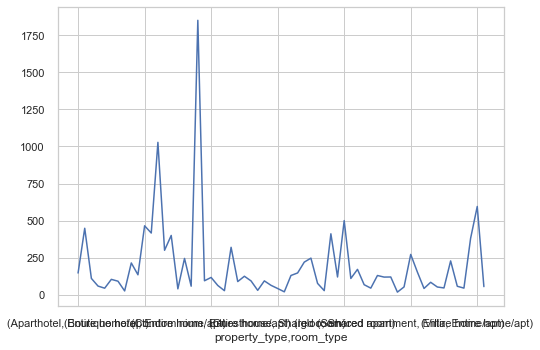

In [68]:
prices_data_1 = listing_2019_IP.groupby(['property_type','room_type']).price.mean()
prices_data_1.plot()

In [69]:
x = len(listing_2019_04_OP['zipcode']) 
x

1789

Of our 58,184 listings I separated the listings into two with those inside Paris (55,653) from those outside Paris (1,789). We note that roughtly 3.07% of our listings are OUTSIDE PARIS while 96.7 % are inside Paris.

# EDA: Here I will now work to find insights from my OUTSIDE PARIS dataset

In [70]:
#I want to group my priced as they range from 0 to 2500 and this will make it simpler for Visualizations
bins = [ 0, 101, 151, 201, 301, 401, 601, 1001] #Here I create pricing groups
labels = ['0-100', '101-150', '151-200', '201-300', '301-600', '601-1000', '1001+']
listing_2019_04_OP['GroupedbyPriceRange'] = pd.cut(listing_2019_04_OP.price, bins, labels = labels,include_lowest = True)

listing_2019_04_OP.head(5)

,Unnamed: 0,id,host_id,host_name,host_since,host_location,host_response_time,instant_bookable,host_response_rate,host_is_superhost,host_identity_verified,first_review,instant_bookable.1,guests_included,extra_people,neighbourhood,beds,cleaning_fee,latitude,longitude,zipcode,smart_location,property_type,room_type,accommodates,bed_type,security_deposit,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,minimum_nights,number_of_reviews,reviews_per_month,cancellation_policy,calculated_host_listings_count,availability_30,availability_60,availability_90,availability_365,last_review,rating_ind,check_in_24h,wifi,heating,washer_dryer,kitchen,Toiletries,hangers,laptop space,family_friendly,fire protection,refrigerator,elevator,bed linens,coffee_maker,hot_water,tv,self_check_in,hair_dryer,dryer,GroupedbyPriceRange
126,126,59182,193906,Pascale,2010-08-07 00:00:00,"Paris, Ile-de-France, France",within a day,f,50-89%,t,t,2010-11-22,f,1,$0.00,Passy,1.0,$40.00,48.87082,2.29138,75116,"Paris, France",Apartment,Entire home/apt,2,Pull-out Sofa,$450.00,92.0,10.0,9.0,10.0,10.0,10.0,9.0,65,2,184,1.80,strict_14_with_grace_period,1,11,16,19,232,2019-03-23,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0-100
305,305,200845,982391,Edouard,2011-08-17 00:00:00,"London, England, United Kingdom",within a few hours,f,100%,f,f,2011-08-31,f,1,$0.00,Passy,1.0,$116.00,48.86349,2.29162,75116,"Paris, France",Apartment,Entire home/apt,2,Real Bed,$0.00,86.0,9.0,9.0,9.0,9.0,10.0,9.0,75,5,166,1.79,flexible,1,30,60,90,365,2018-02-07,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,0-100
352,352,240484,1260856,Elisabeth,2011-10-07 00:00:00,"Paris, Île-de-France, France",0,f,NaN,t,f,2012-06-03,f,1,$0.00,Passy,0.0,$60.00,48.87447,2.28254,75116,"Paris, France",Apartment,Entire home/apt,2,Real Bed,$500.00,96.0,10.0,9.0,9.0,10.0,10.0,9.0,225,5,22,0.26,moderate,1,23,53,76,345,2018-12-06,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,201-300
360,360,245715,1275649,Gwenael,2011-10-11 00:00:00,"Paris, Île-de-France, France",0,f,NaN,t,t,2014-07-02,f,1,$0.00,Passy,1.0,0,48.86457,2.30115,75116,"Paris, France",Apartment,Entire home/apt,2,Real Bed,$730.00,90.0,9.0,9.0,9.0,8.0,10.0,9.0,143,4,33,0.57,moderate,2,0,0,0,68,2018-12-29,1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,101-150
388,388,266484,1397411,Hélène,2011-11-11 00:00:00,Ile de France,within a day,f,100%,f,f,2012-05-01,f,1,$0.00,Ménilmontant,1.0,$20.00,48.84897,2.41614,94160,"Saint-Mandé, France",Apartment,Entire home/apt,2,Real Bed,$250.00,93.0,10.0,9.0,9.0,9.0,9.0,9.0,60,2,27,0.32,strict_14_with_grace_period,1,0,0,0,250,2017-06-08,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0-100


In [71]:
#I want to group my Reviews 
bins = [ 0, 26, 51, 76, 86, 96, 100] #Here I create pricing groups
labels = ['0-25.0', '26.0-50.0', '51.0-75.0', '76.0-85.0', '86.0-95.0', '96+']
listing_2019_04_OP['Rating_By_Range'] = pd.cut(listing_2019_04_OP.review_scores_rating, bins, labels = labels,include_lowest = True)

listing_2019_04_OP.head(5)

,Unnamed: 0,id,host_id,host_name,host_since,host_location,host_response_time,instant_bookable,host_response_rate,host_is_superhost,host_identity_verified,first_review,instant_bookable.1,guests_included,extra_people,neighbourhood,beds,cleaning_fee,latitude,longitude,zipcode,smart_location,property_type,room_type,accommodates,bed_type,security_deposit,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,minimum_nights,number_of_reviews,reviews_per_month,cancellation_policy,calculated_host_listings_count,availability_30,availability_60,availability_90,availability_365,last_review,rating_ind,check_in_24h,wifi,heating,washer_dryer,kitchen,Toiletries,hangers,laptop space,family_friendly,fire protection,refrigerator,elevator,bed linens,coffee_maker,hot_water,tv,self_check_in,hair_dryer,dryer,GroupedbyPriceRange,Rating_By_Range
126,126,59182,193906,Pascale,2010-08-07 00:00:00,"Paris, Ile-de-France, France",within a day,f,50-89%,t,t,2010-11-22,f,1,$0.00,Passy,1.0,$40.00,48.87082,2.29138,75116,"Paris, France",Apartment,Entire home/apt,2,Pull-out Sofa,$450.00,92.0,10.0,9.0,10.0,10.0,10.0,9.0,65,2,184,1.80,strict_14_with_grace_period,1,11,16,19,232,2019-03-23,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0-100,86.0-95.0
305,305,200845,982391,Edouard,2011-08-17 00:00:00,"London, England, United Kingdom",within a few hours,f,100%,f,f,2011-08-31,f,1,$0.00,Passy,1.0,$116.00,48.86349,2.29162,75116,"Paris, France",Apartment,Entire home/apt,2,Real Bed,$0.00,86.0,9.0,9.0,9.0,9.0,10.0,9.0,75,5,166,1.79,flexible,1,30,60,90,365,2018-02-07,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,0-100,76.0-85.0
352,352,240484,1260856,Elisabeth,2011-10-07 00:00:00,"Paris, Île-de-France, France",0,f,NaN,t,f,2012-06-03,f,1,$0.00,Passy,0.0,$60.00,48.87447,2.28254,75116,"Paris, France",Apartment,Entire home/apt,2,Real Bed,$500.00,96.0,10.0,9.0,9.0,10.0,10.0,9.0,225,5,22,0.26,moderate,1,23,53,76,345,2018-12-06,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,201-300,86.0-95.0
360,360,245715,1275649,Gwenael,2011-10-11 00:00:00,"Paris, Île-de-France, France",0,f,NaN,t,t,2014-07-02,f,1,$0.00,Passy,1.0,0,48.86457,2.30115,75116,"Paris, France",Apartment,Entire home/apt,2,Real Bed,$730.00,90.0,9.0,9.0,9.0,8.0,10.0,9.0,143,4,33,0.57,moderate,2,0,0,0,68,2018-12-29,1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,101-150,86.0-95.0
388,388,266484,1397411,Hélène,2011-11-11 00:00:00,Ile de France,within a day,f,100%,f,f,2012-05-01,f,1,$0.00,Ménilmontant,1.0,$20.00,48.84897,2.41614,94160,"Saint-Mandé, France",Apartment,Entire home/apt,2,Real Bed,$250.00,93.0,10.0,9.0,9.0,9.0,9.0,9.0,60,2,27,0.32,strict_14_with_grace_period,1,0,0,0,250,2017-06-08,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0-100,86.0-95.0


In [72]:
listing_2019_04_OP.groupby(['property_type']).agg({'id':'count'}) #Let's see how many types of property we have by listings ID

,id
property_type,
Aparthotel,1
Apartment,1543
Bed and breakfast,11
Boat,2
Boutique hotel,49
Casa particular (Cuba),1
Condominium,79
Guest suite,1
Guesthouse,9


In [73]:
listing_2019_04_OP.groupby(['property_type', 'room_type']).agg({'id':'count'}) #Now let's break it down by room type

id
property_type          room_type            
Aparthotel             Entire home/apt     1
Apartment              Entire home/apt  1384
                       Private room      148
                       Shared room        11
Bed and breakfast      Private room       11
Boat                   Entire home/apt     2
Boutique hotel         Private room       49
Casa particular (Cuba) Entire home/apt     1
Condominium            Entire home/apt    63
                       Private room       13
                       Shared room         3
Guest suite            Private room        1
Guesthouse             Entire home/apt     5
                       Private room        3
                       Shared room         1
Hotel                  Private room        5
House                  Entire home/apt    19
                       Private room        9
Houseboat              Entire home/apt     1
Loft                   Entire home/apt    24
                       Private room        1
Other                  Entire home/apt     2
Resort                 Private room        1
Serviced apartment     Entire home/apt    22
Tiny house             Shared room         1
Townhouse              Entire home/apt     5
                       Private room        2
Villa                  Entire home/apt     1

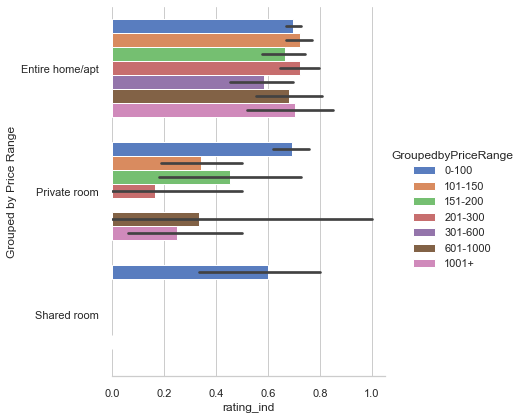

In [74]:
import seaborn as sns #Here we look at Types of Rentals by both Price Groupings and how highly they were rated
sns.set(style="whitegrid")
cmap = sns.cubehelix_palette(12, start=.5, rot=-.85, as_cmap=True)

# Draw a nested barplot to show Churn levels by Salary and Age
g = sns.catplot(x="rating_ind", y="room_type", hue="GroupedbyPriceRange", data=listing_2019_04_OP,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Grouped by Price Range")

In [75]:
B = listing_2019_04_OP['price'].describe().T

In [76]:
B

count    1789.000000
mean      154.846283
std       195.383236
min         0.000000
25%        64.000000
50%        95.000000
75%       150.000000
max      1990.000000
Name: price, dtype: float64

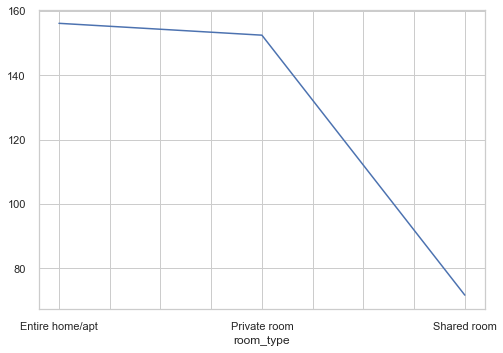

In [77]:
prices_data = listing_2019_04_OP.groupby(['room_type']).price.mean()
prices_data.plot()

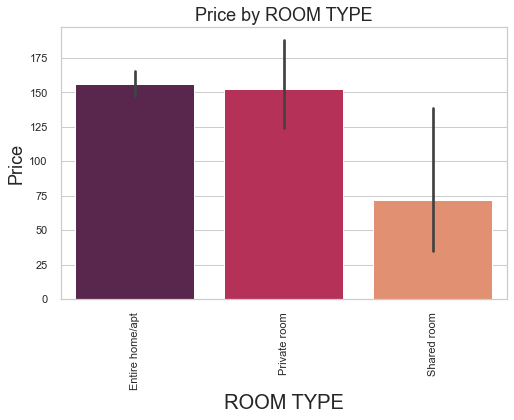

In [78]:
price_room_type= listing_2019_04_OP.sort_values(by='room_type')
fig = plt.figure(figsize=(8,5))
ax = sns.barplot( x='room_type', y='price', data=price_room_type, palette="rocket") 
ax.set_title('Price by ROOM TYPE', fontsize=18) 
ax.set_xlabel('ROOM TYPE', fontsize=20) 
ax.set_ylabel('Price', fontsize=18) 
ax.set_xticklabels(labels=price_room_type['room_type'].unique(), rotation=90) 
plt.show();

In [106]:
room_data = listing_2019_04_OP.groupby(['room_type']).price.mean()
room_data

room_type
Entire home/apt    156.101307
Private room       152.419753
Shared room         71.687500
Name: price, dtype: float64

In [107]:
bed_data = listing_2019_04_OP.groupby(['bed_type']).price.mean()
bed_data

bed_type
Couch             60.857143
Futon             74.500000
Pull-out Sofa     66.113924
Real Bed         159.855962
Name: price, dtype: float64

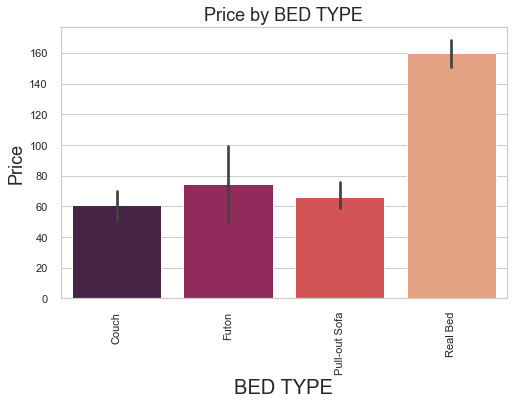

In [79]:
bed_type_price = listing_2019_04_OP.sort_values(by='bed_type')
fig = plt.figure(figsize=(8,5))
ax = sns.barplot( x='bed_type', y='price', data=bed_type_price, palette="rocket") 
ax.set_title('Price by BED TYPE', fontsize=18) 
ax.set_xlabel('BED TYPE', fontsize=20) 
ax.set_ylabel('Price', fontsize=18) 
ax.set_xticklabels(labels=bed_type_price['bed_type'].unique(), rotation=90) 
plt.show();

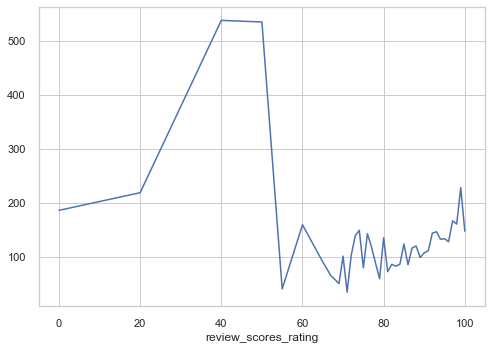

In [80]:
prices_data3 = listing_2019_04_OP.groupby(['review_scores_rating']).price.mean()
prices_data3.plot()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


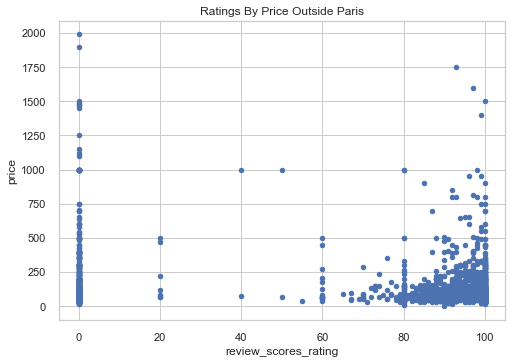

In [81]:
listing_2019_04_OP.plot(x='review_scores_rating', y='price', kind='scatter')
plt.title('Ratings By Price Outside Paris')
plt.show()

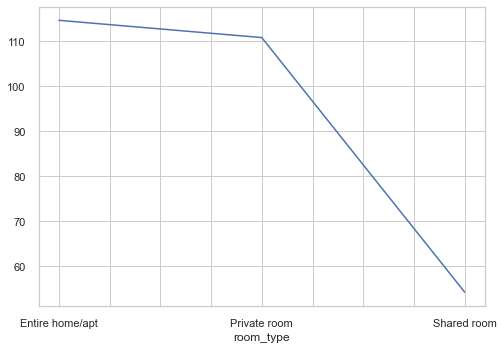

In [82]:
prices_data2 = listing_2019_IP.groupby(['room_type']).price.mean()
prices_data2.plot()

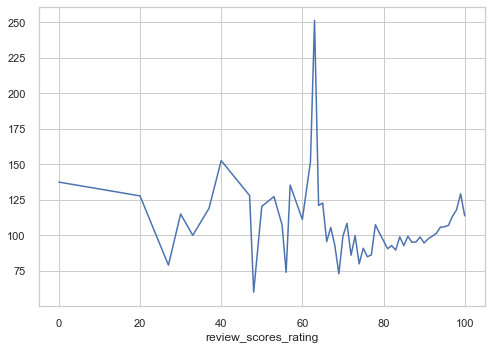

In [83]:
prices_data4 = listing_2019_IP.groupby(['review_scores_rating']).price.mean()
prices_data4.plot()

In [84]:
A = listing_2019_IP['price'].describe().T

#Now let's do a few comparisons to INSIDE PARIS to OUTSIDE Paris

In [85]:
#Here I wish to review the types of amenities the properites have but first I must clean my data

In [86]:
listing_2019_04_OP.head(5)

,Unnamed: 0,id,host_id,host_name,host_since,host_location,host_response_time,instant_bookable,host_response_rate,host_is_superhost,host_identity_verified,first_review,instant_bookable.1,guests_included,extra_people,neighbourhood,beds,cleaning_fee,latitude,longitude,zipcode,smart_location,property_type,room_type,accommodates,bed_type,security_deposit,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,minimum_nights,number_of_reviews,reviews_per_month,cancellation_policy,calculated_host_listings_count,availability_30,availability_60,availability_90,availability_365,last_review,rating_ind,check_in_24h,wifi,heating,washer_dryer,kitchen,Toiletries,hangers,laptop space,family_friendly,fire protection,refrigerator,elevator,bed linens,coffee_maker,hot_water,tv,self_check_in,hair_dryer,dryer,GroupedbyPriceRange,Rating_By_Range
126,126,59182,193906,Pascale,2010-08-07 00:00:00,"Paris, Ile-de-France, France",within a day,f,50-89%,t,t,2010-11-22,f,1,$0.00,Passy,1.0,$40.00,48.87082,2.29138,75116,"Paris, France",Apartment,Entire home/apt,2,Pull-out Sofa,$450.00,92.0,10.0,9.0,10.0,10.0,10.0,9.0,65,2,184,1.80,strict_14_with_grace_period,1,11,16,19,232,2019-03-23,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0-100,86.0-95.0
305,305,200845,982391,Edouard,2011-08-17 00:00:00,"London, England, United Kingdom",within a few hours,f,100%,f,f,2011-08-31,f,1,$0.00,Passy,1.0,$116.00,48.86349,2.29162,75116,"Paris, France",Apartment,Entire home/apt,2,Real Bed,$0.00,86.0,9.0,9.0,9.0,9.0,10.0,9.0,75,5,166,1.79,flexible,1,30,60,90,365,2018-02-07,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,0-100,76.0-85.0
352,352,240484,1260856,Elisabeth,2011-10-07 00:00:00,"Paris, Île-de-France, France",0,f,NaN,t,f,2012-06-03,f,1,$0.00,Passy,0.0,$60.00,48.87447,2.28254,75116,"Paris, France",Apartment,Entire home/apt,2,Real Bed,$500.00,96.0,10.0,9.0,9.0,10.0,10.0,9.0,225,5,22,0.26,moderate,1,23,53,76,345,2018-12-06,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,201-300,86.0-95.0
360,360,245715,1275649,Gwenael,2011-10-11 00:00:00,"Paris, Île-de-France, France",0,f,NaN,t,t,2014-07-02,f,1,$0.00,Passy,1.0,0,48.86457,2.30115,75116,"Paris, France",Apartment,Entire home/apt,2,Real Bed,$730.00,90.0,9.0,9.0,9.0,8.0,10.0,9.0,143,4,33,0.57,moderate,2,0,0,0,68,2018-12-29,1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,101-150,86.0-95.0
388,388,266484,1397411,Hélène,2011-11-11 00:00:00,Ile de France,within a day,f,100%,f,f,2012-05-01,f,1,$0.00,Ménilmontant,1.0,$20.00,48.84897,2.41614,94160,"Saint-Mandé, France",Apartment,Entire home/apt,2,Real Bed,$250.00,93.0,10.0,9.0,9.0,9.0,9.0,9.0,60,2,27,0.32,strict_14_with_grace_period,1,0,0,0,250,2017-06-08,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0-100,86.0-95.0


[Text(0, 0, 'Aparthotel'),
 Text(0, 0, 'Apartment'),
 Text(0, 0, 'Bed and breakfast'),
 Text(0, 0, 'Boat'),
 Text(0, 0, 'Boutique hotel'),
 Text(0, 0, 'Casa particular (Cuba)'),
 Text(0, 0, 'Condominium'),
 Text(0, 0, 'Guest suite'),
 Text(0, 0, 'Guesthouse'),
 Text(0, 0, 'Hotel'),
 Text(0, 0, 'House'),
 Text(0, 0, 'Houseboat'),
 Text(0, 0, 'Loft'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Resort'),
 Text(0, 0, 'Serviced apartment'),
 Text(0, 0, 'Tiny house'),
 Text(0, 0, 'Townhouse'),
 Text(0, 0, 'Villa')]

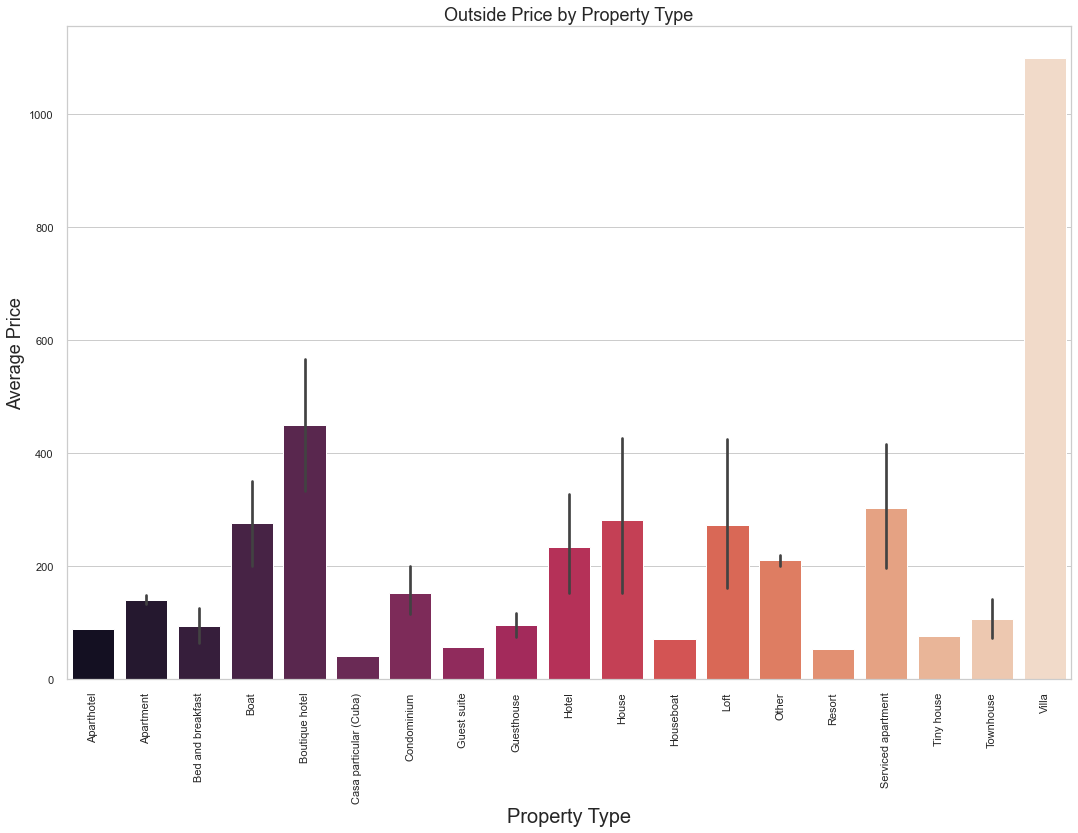

In [87]:


Price_By_Type = listing_2019_04_OP.sort_values(by='property_type')

fig = plt.figure(figsize=(18,12))

ax = sns.barplot( x='property_type', y='price', data=Price_By_Type, palette="rocket") #change palette try
ax.set_title('Outside Price by Property Type', fontsize=18) 
ax.set_xlabel('Property Type', fontsize=20) 
ax.set_ylabel('Average Price', fontsize=18) 
ax.set_xticklabels(labels=Price_By_Type['property_type'].unique(), rotation=90) 


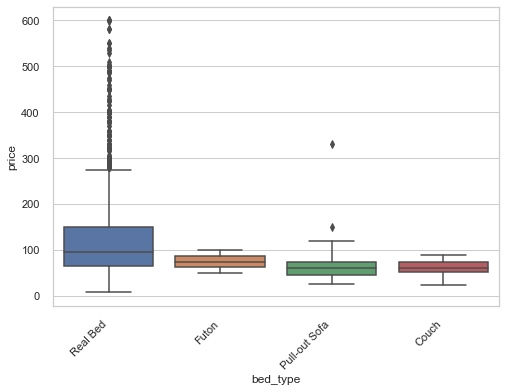

In [88]:
sort_price = listing_2019_04_OP.loc[(listing_2019_04_OP.price <= 800) & (listing_2019_04_OP.price > 20)]\
              .groupby('bed_type')['price']\
 .median()\
 .sort_values(ascending=False)\
.index
sns.boxplot(y='price', x='bed_type', data=listing_2019_04_OP.loc[(listing_2019_04_OP.price <= 600) & (listing_2019_04_OP.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();



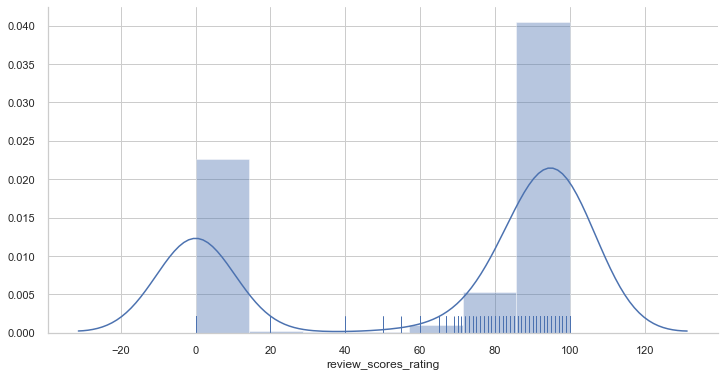

In [89]:
plt.figure(figsize=(12,6)) #let's see a distribution of ratings
sns.distplot(listing_2019_04_OP.review_scores_rating.dropna(), rug=True)
sns.despine()
plt.show();


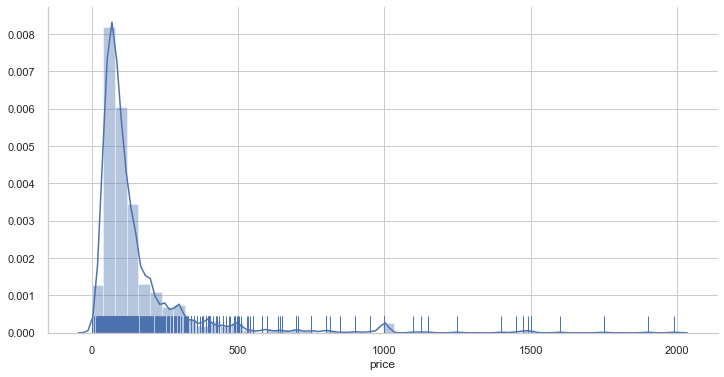

In [90]:
plt.figure(figsize=(12,6)) #let's see a distribution of ratings
sns.distplot(listing_2019_04_OP.price.dropna(), rug=True)
sns.despine()
plt.show();

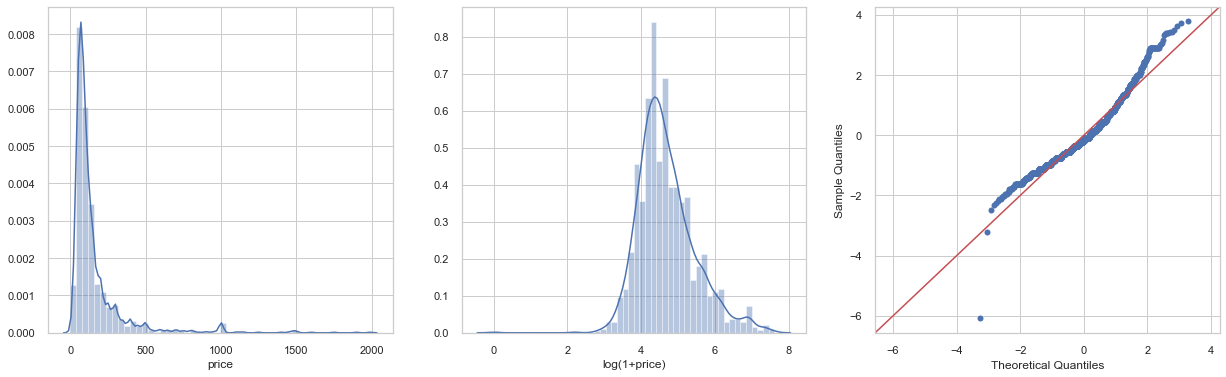

In [91]:
import statsmodels.api #Here I create a distribution plot and add logs to display a large amount of data in a compact way
import statsmodels.api as sm #We see here I have a log normal distribution
from scipy import stats
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(listing_2019_04_OP['price'], ax=axes[0])
sns.distplot(np.log1p(listing_2019_04_OP['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(listing_2019_04_OP['price']), stats.norm, fit=True, line='45', ax=axes[2]);

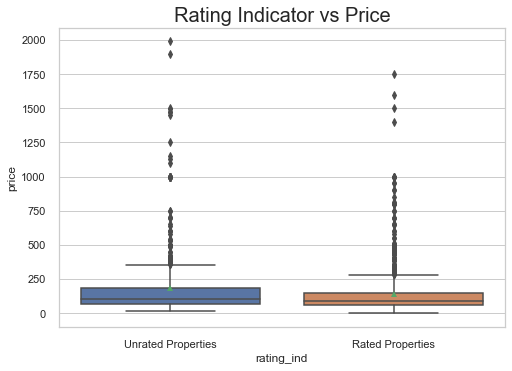

In [92]:
sns.boxplot(x=listing_2019_04_OP['rating_ind'], y=listing_2019_04_OP['price'], showmeans=True)
plt.title('Rating Indicator vs Price',fontsize=20 )
plt.xticks([0,1],['Unrated Properties', 'Rated Properties'])
plt.show()

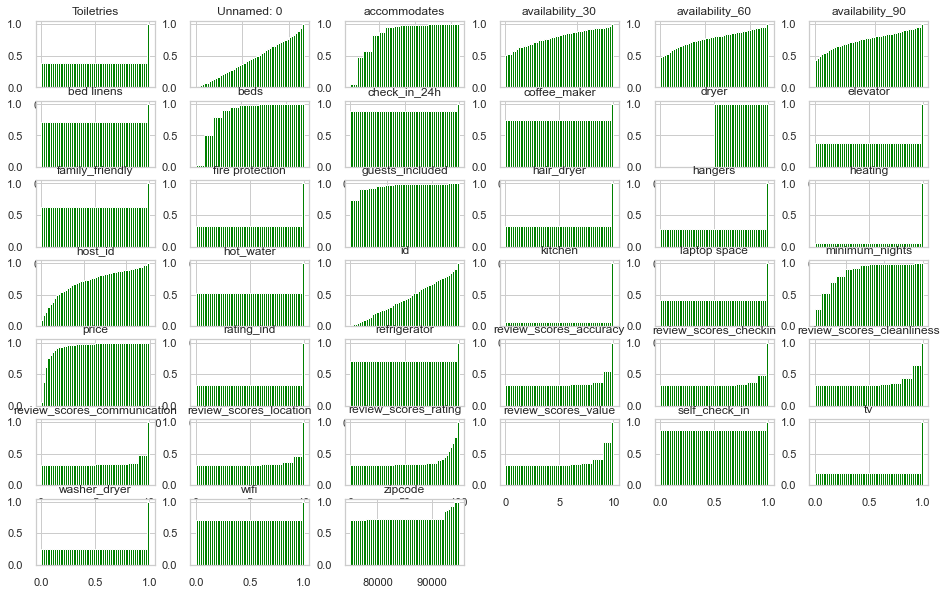

In [93]:
listing_2019_04_OP.drop(columns=['latitude', 'longitude', #Here I drop columns that are not relevant to my analysis
                             'availability_365',
                             'calculated_host_listings_count',
                             'number_of_reviews',
                             'reviews_per_month']).hist(bins=50, figsize=(16, 10),color='green',
                                                        cumulative=True, density=True)
plt.subplots_adjust(hspace=0.2)
plt.show()
# plt.savefig('2019_04-data-description.png', bbox_inches='tight')

According to the histograms above, we find that outside Paris 90% of each of the locations are able to accommodate at minumum of  2 persons, the review scores rating is lower than inside Paris for location for the majority of properties for location score, nearly 50% locations need clients to reserve at least 2 nights. Moreover, the most important point, the price of one night is less than $100 for 50% locations.

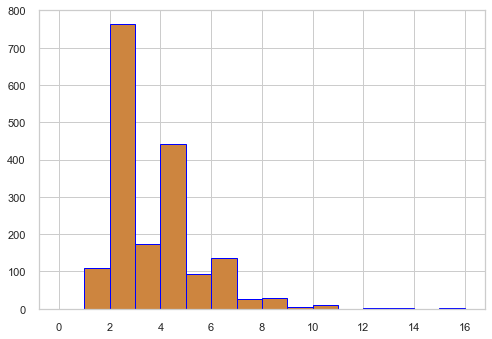

In [94]:
plt.hist(listing_2019_04_OP["accommodates"],  #Here we notice the majority of the rentals are for 2 persons
        facecolor="peru",
        edgecolor="blue",
        bins = 16,
        range = (0, 16))
plt.show()

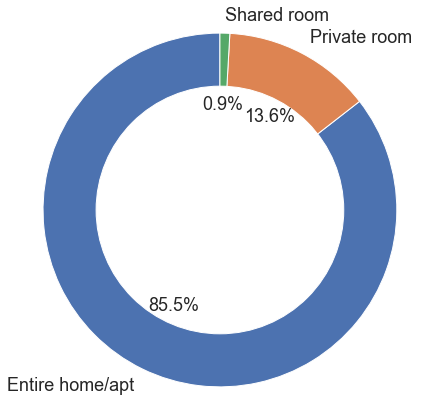

In [95]:
plt.figure(figsize=(7, 7)) #Here we notice that 86.4 % entire full apartments 

AIRBNB_CIRCLE = plt.Circle((0, 0), 0.7, color='white')

d = plt.pie(listing_2019_04_OP.groupby(['room_type'])['id'].nunique().reset_index().id,
            labels=listing_2019_04_OP.room_type.unique(),
            autopct='%1.1f%%',
            startangle=90,
            labeldistance=1.1)
plt.axis('equal')
plt.gca().add_artist(AIRBNB_CIRCLE)

for i, (a, b, c) in enumerate(d):
    if i > 0:
        a.set_fontsize(18)
        b.set_fontsize(18)
        c.set_fontsize(18)

In [96]:
listing_2019_04_OP.groupby('host_id')['id'].nunique().reset_index().describe(percentiles=(0.75, 0.95)) #From this data it looks like 5% of the hosts in Paris rent more than one location

,host_id,id
count,1.576000e+03,1576.000000
mean,7.384580e+07,1.135152
std,7.422264e+07,0.616293
min,5.815000e+04,1.000000
50%,4.128431e+07,1.000000
75%,1.162228e+08,1.000000
95%,2.385384e+08,2.000000
max,2.540436e+08,10.000000


 # Here I create a new list where I group by neighborhoods and their listing ids associated listing id so we can see # of listings by neighborhood

In [97]:
nbh_count_2019_04_OP = listing_2019_04_OP.groupby('neighbourhood')['id'].nunique().reset_index() 
nbh_count_2019_04_OP.rename(columns={'id':'nb'}, inplace=True) #nb=an airbnb listing


In [98]:
nbh_count_2019_04_OP.head(55) #Here are my counts by Neighborhood

,neighbourhood,nb
0,Batignolles-Monceau,109
1,Buttes-Chaumont,49
2,Buttes-Montmartre,17
3,Entrepôt,1
4,Gobelins,27
5,Hôtel-de-Ville,1
6,Louvre,1
7,Ménilmontant,27
8,Observatoire,59
9,Opéra,2


In [99]:
Geo_NBH_2019_OP = pd.merge(Geo_NBH_2019_OP, nbh_count_2019_04_OP, on='neighbourhood')
Geo_NBH_2019_OP['QP'] = Geo_NBH_2019_OP['nb'] / Geo_NBH_2019_OP['nb'].sum()
Geo_NBH_2019_OP['QP_str'] = Geo_NBH_2019_OP['QP'].apply(lambda x : str(round(x*100, 1)) + '%')

In [100]:
Geo_NBH_2019_OP.head(25)

,neighbourhood,neighbourhood_group,geometry,nb,QP,QP_str
0,Batignolles-Monceau,None,"MULTIPOLYGON (((2.29517 48.87396, 2.29504 48.8...",109,0.060928,6.1%
1,Buttes-Chaumont,None,"MULTIPOLYGON (((2.38943 48.90122, 2.39014 48.9...",49,0.027390,2.7%
2,Opéra,None,"MULTIPOLYGON (((2.33978 48.88203, 2.33982 48.8...",2,0.001118,0.1%
3,Entrepôt,None,"MULTIPOLYGON (((2.36469 48.88437, 2.36485 48.8...",1,0.000559,0.1%
4,Gobelins,None,"MULTIPOLYGON (((2.37491 48.83801, 2.37698 48.8...",27,0.015092,1.5%
5,Vaugirard,None,"MULTIPOLYGON (((2.29932 48.85217, 2.30088 48.8...",67,0.037451,3.7%
6,Reuilly,None,"MULTIPOLYGON (((2.41388 48.83357, 2.41401 48.8...",73,0.040805,4.1%
7,Louvre,None,"MULTIPOLYGON (((2.32801 48.86992, 2.32997 48.8...",1,0.000559,0.1%
8,Élysée,None,"MULTIPOLYGON (((2.32584 48.86956, 2.32569 48.8...",9,0.005031,0.5%
9,Ménilmontant,None,"MULTIPOLYGON (((2.41276 48.87547, 2.41284 48.8...",27,0.015092,1.5%


In [101]:
nbh_color_map_2019_04_OP = branca.colormap.linear.YlOrRd_09.scale(min(nbh_count_2019_04_OP['nb']),
                                                                   max(nbh_count_2019_04_OP['nb']))

In [102]:
map_test = nbh_color_map_2019_04_OP    

In [103]:
nbh_color_map_2019_04_OP


In [104]:
nbh_locs_2019_04_map_OP = folium.Map(location=[48.856614, 2.3522219], zoom_start = 12, tiles='cartodbpositron')
style_function = lambda x: {
    'fillColor': map_test(x['properties']['nb']),
    'color': 'white',
    'weight': 1,
    'fillOpacity': 0.7
}
nbh_locsNb_2019_04_OP = folium.GeoJson(
   Geo_NBH_2019_OP,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['neighbourhood', 'nb', 'QP_str'],
        aliases=['Neighbourhood', 'Location amount', 'Quote-part'],
        localize=True
    )
).add_to(nbh_locs_2019_04_map_OP)

map_test.add_to(nbh_locs_2019_04_map_OP)
map_test.caption = 'Airbnb location amount'
map_test.add_to(nbh_locs_2019_04_map_OP)

In [105]:
nbh_locs_2019_04_map_OP


#That concludes my short review of OUTSIDE PARIS